In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = 'Arial Unicode MS')

In [255]:
# 데이터 가지고오기
socar_df = pd.read_csv("../../0. raw_data/insurance_fraud_detect_data.csv")
pd.set_option('display.max_columns', len(socar_df.columns))
socar_df.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,1.302547e+05,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.000000e+00,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,2.581306e+05,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1.341009e+06,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,5.240306e+05,1209410,1,0,0,2,0,0,0,-1,0


In [15]:
socar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          16000 non-null  int64  
 14  repair_cost            16000 non-null  float64
 15  in

In [16]:
socar_train = socar_df[socar_df["test_set"]==0]
socar_test = socar_df[socar_df["test_set"]==1]

In [17]:
# b2b, accident_ratio, pf_type, socarpass, socarsave
# insurance_site_aid_YN, police_site_aid_YN, total_prsn_cnt

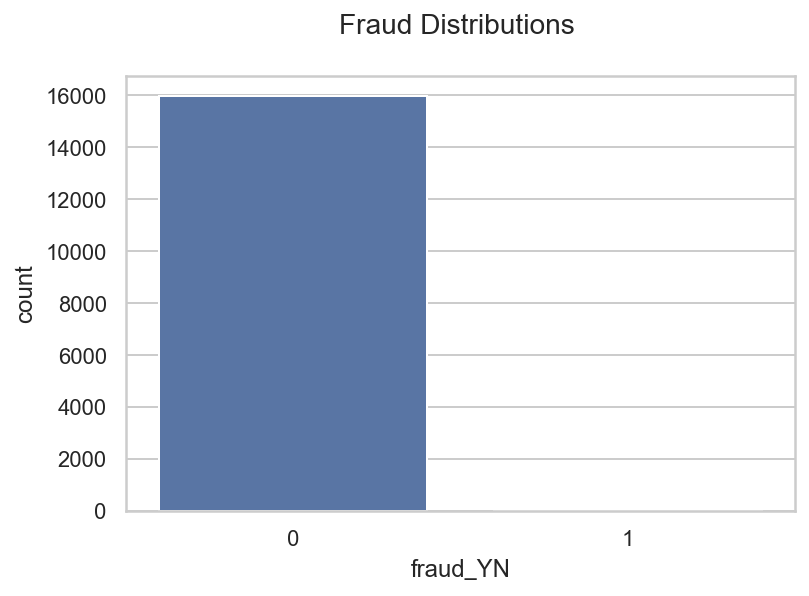

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('fraud_YN', data=socar_df)
plt.title("Fraud Distributions \n", fontsize=14)
plt.show()

In [19]:
socar_df.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt', 'test_set'],
      dtype='object')

In [30]:
socar_df.accident_hour.unique()

array([ 4,  6,  5,  1, -1,  2,  3])

In [31]:
socar_df.start_hour.unique()

array([4, 1, 3, 6, 5, 2])

In [36]:
socar_df[socar_df.accident_hour==-1].index
socar_del = socar_df.drop(list(socar_df[socar_df.accident_hour==-1].index))

In [41]:
socar_del['accident_hour'].corr(socar_del['duration'])

0.056758257415605515

<Figure size 432x288 with 0 Axes>

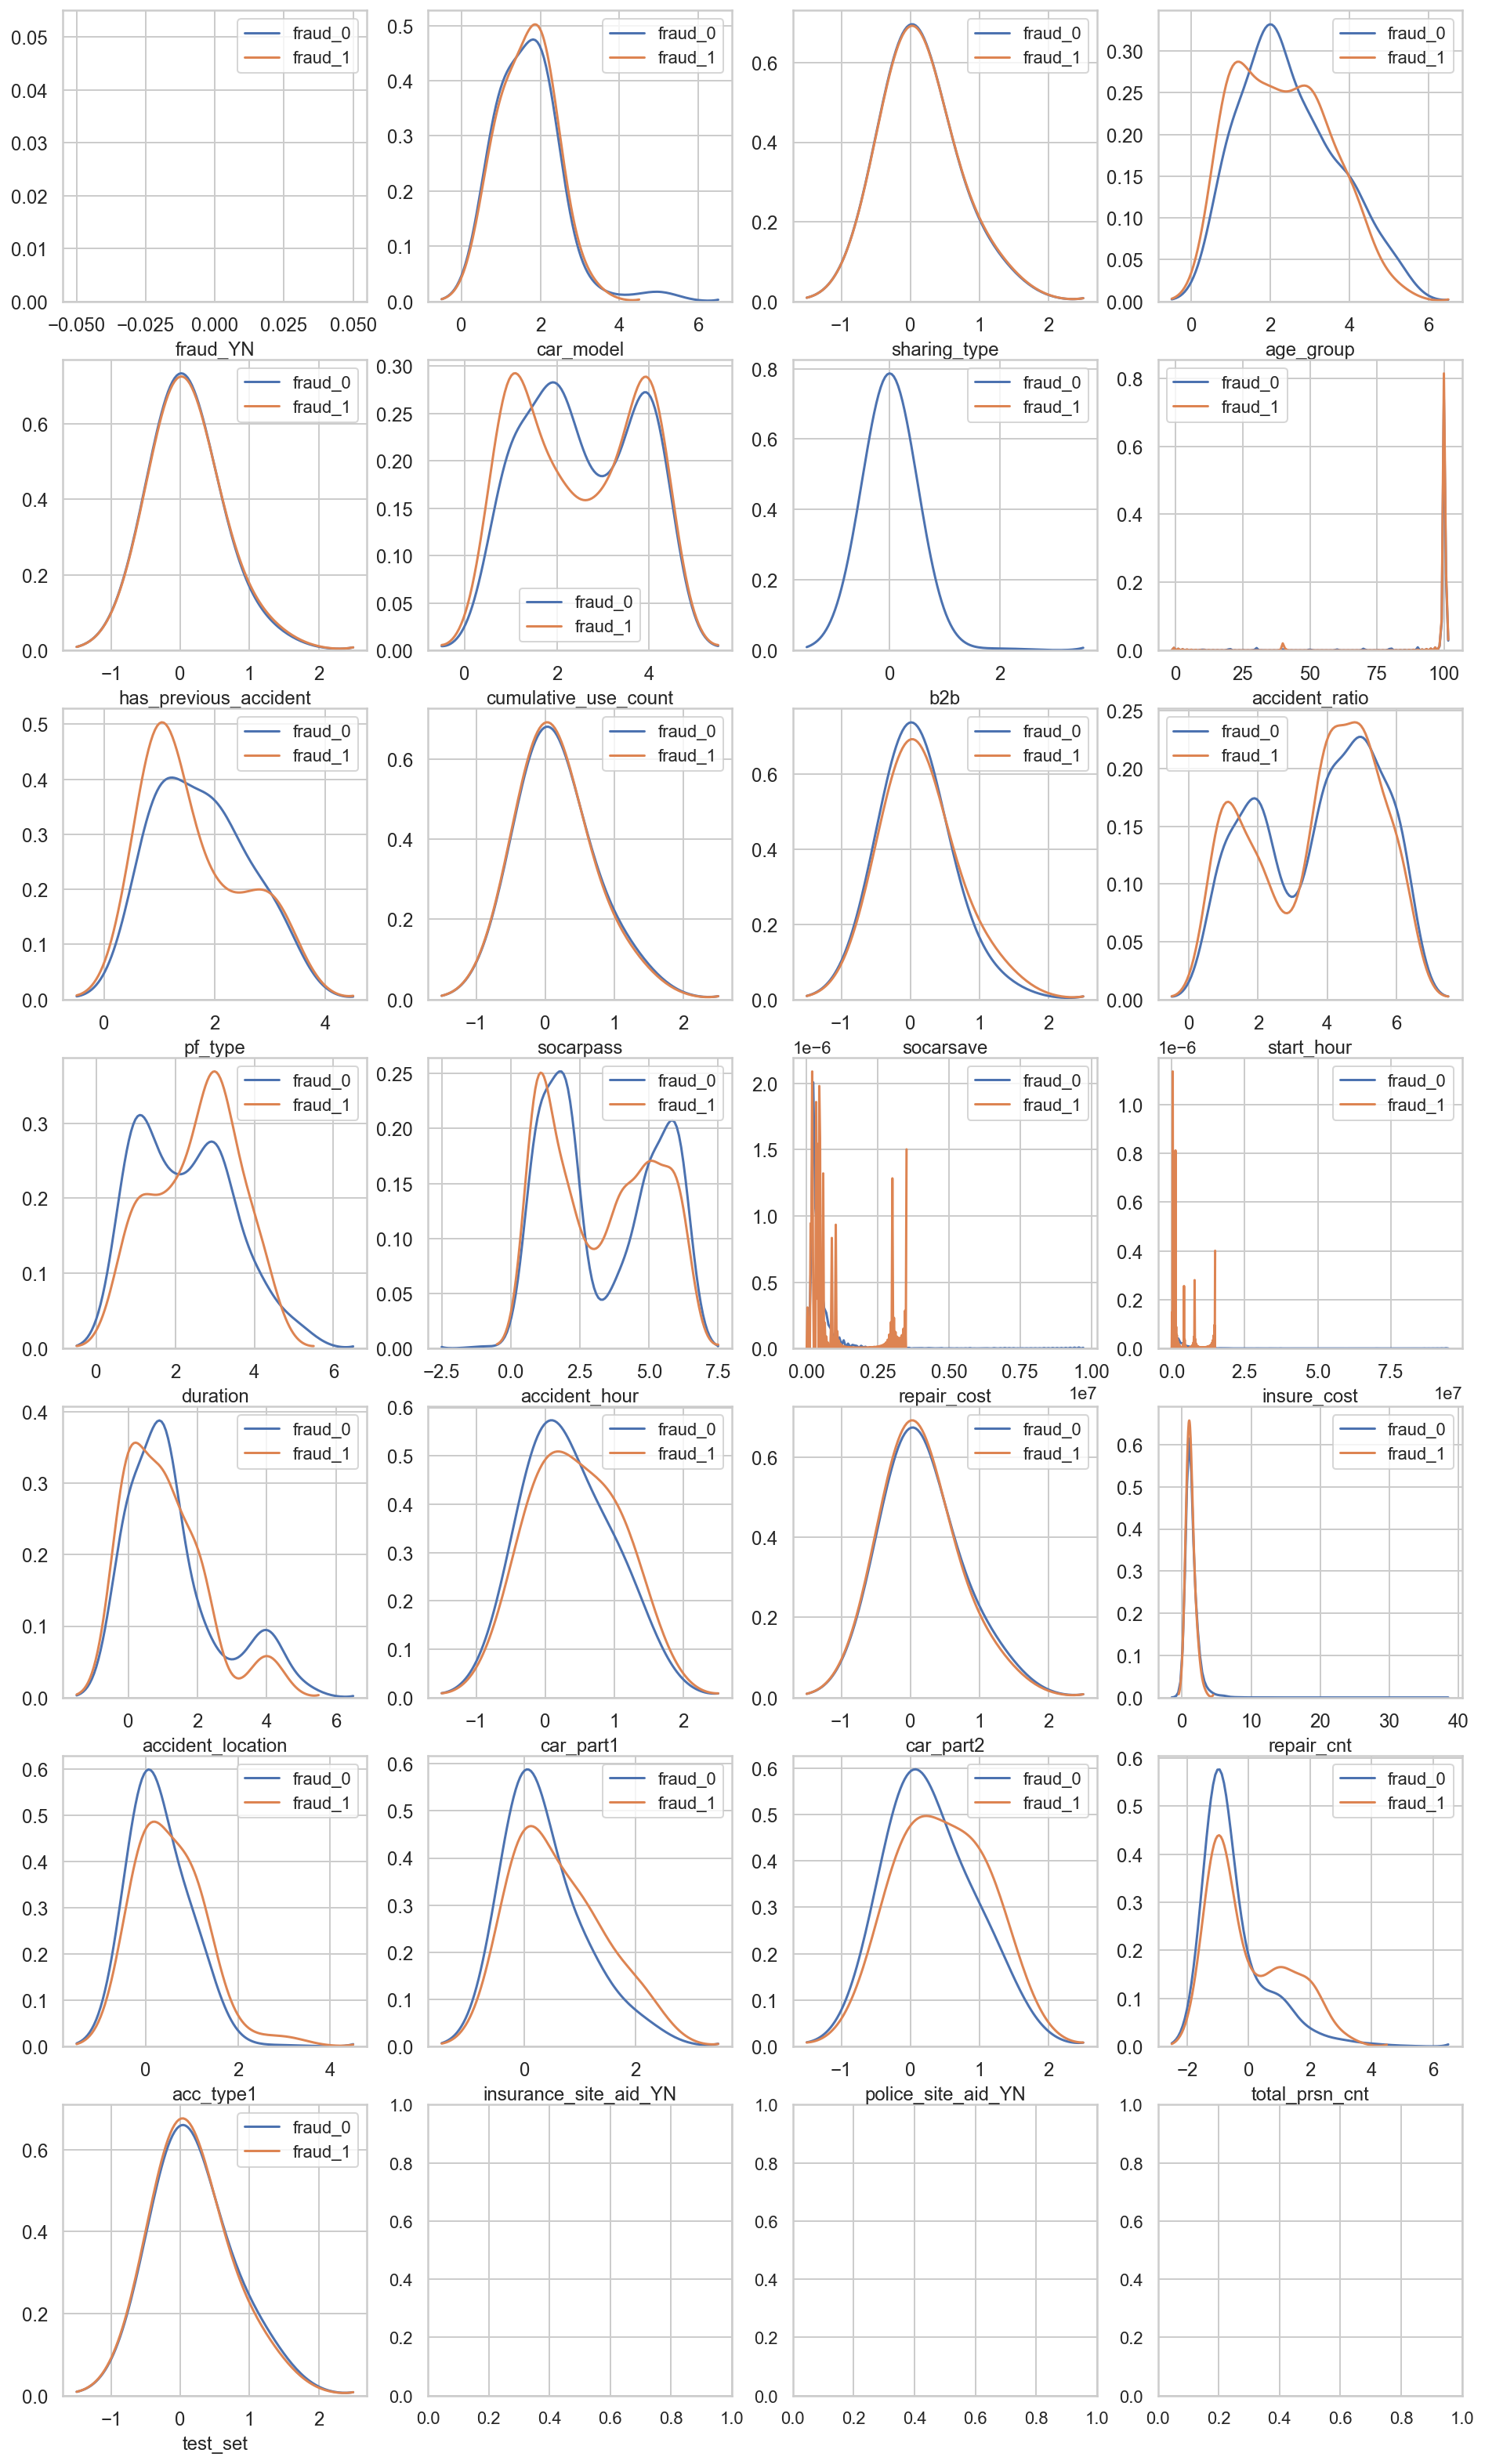

In [7]:
# 컬럼별 상관관계 확인 
import seaborn as sns

var = socar_df.columns.values 

i = 0

t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]

sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(7,4,figsize=(16,28))


for feature in var:
    i += 1 
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label = 'fraud_0')
    sns.kdeplot(t1[feature], bw=0.5, label = 'fraud_1')

    plt.xlabel(feature,fontsize=12)
    locs, labels = plt.xticks()

    plt.tick_params(axis='both', which = 'major', labelsize=12)

plt.show()

### 1. b2b
- data 설명: 

```
0: 개인고객
1: 법인
2: 법인구성원
-1 : null
```

- 실측값 : 0, 2

In [8]:
socar_df.b2b.unique()

array([0, 2])

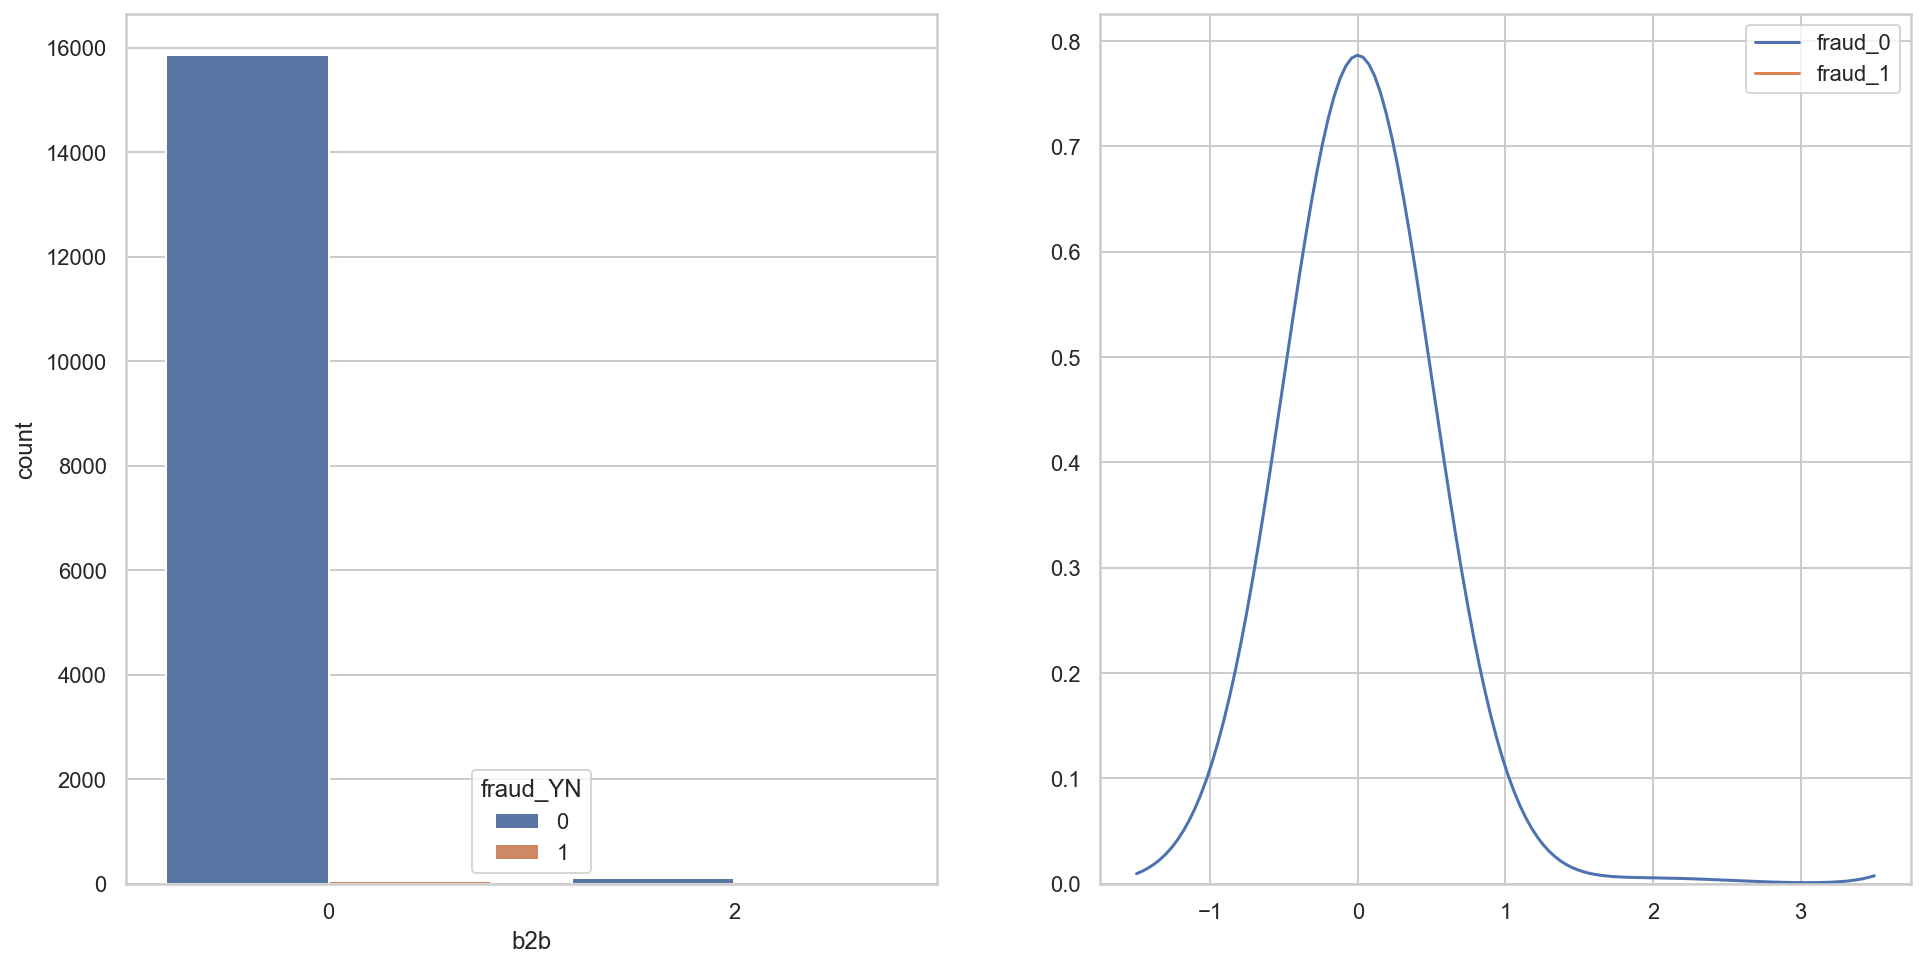

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 2, figsize=(16,8))

plt.subplot(1,2,1)
sns.countplot('b2b', data=socar_df, hue='fraud_YN')

plt.subplot(1,2,2)
t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]

sns.kdeplot(t0['b2b'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['b2b'], bw=0.5, label = 'fraud_1')

plt.show()

In [10]:
# b2b = 2 이면, fraud = 0 
# 이 컬럼, 버리는게 맞는걸까 ?

### 2.  accident_ratio
- 과실율 

In [11]:
socar_df.accident_ratio.unique()

array([100,   0,  90,  55,  30,  80,  40,  10,  70,  20,  60,  85,  75,
        50,  15,  65,  25])

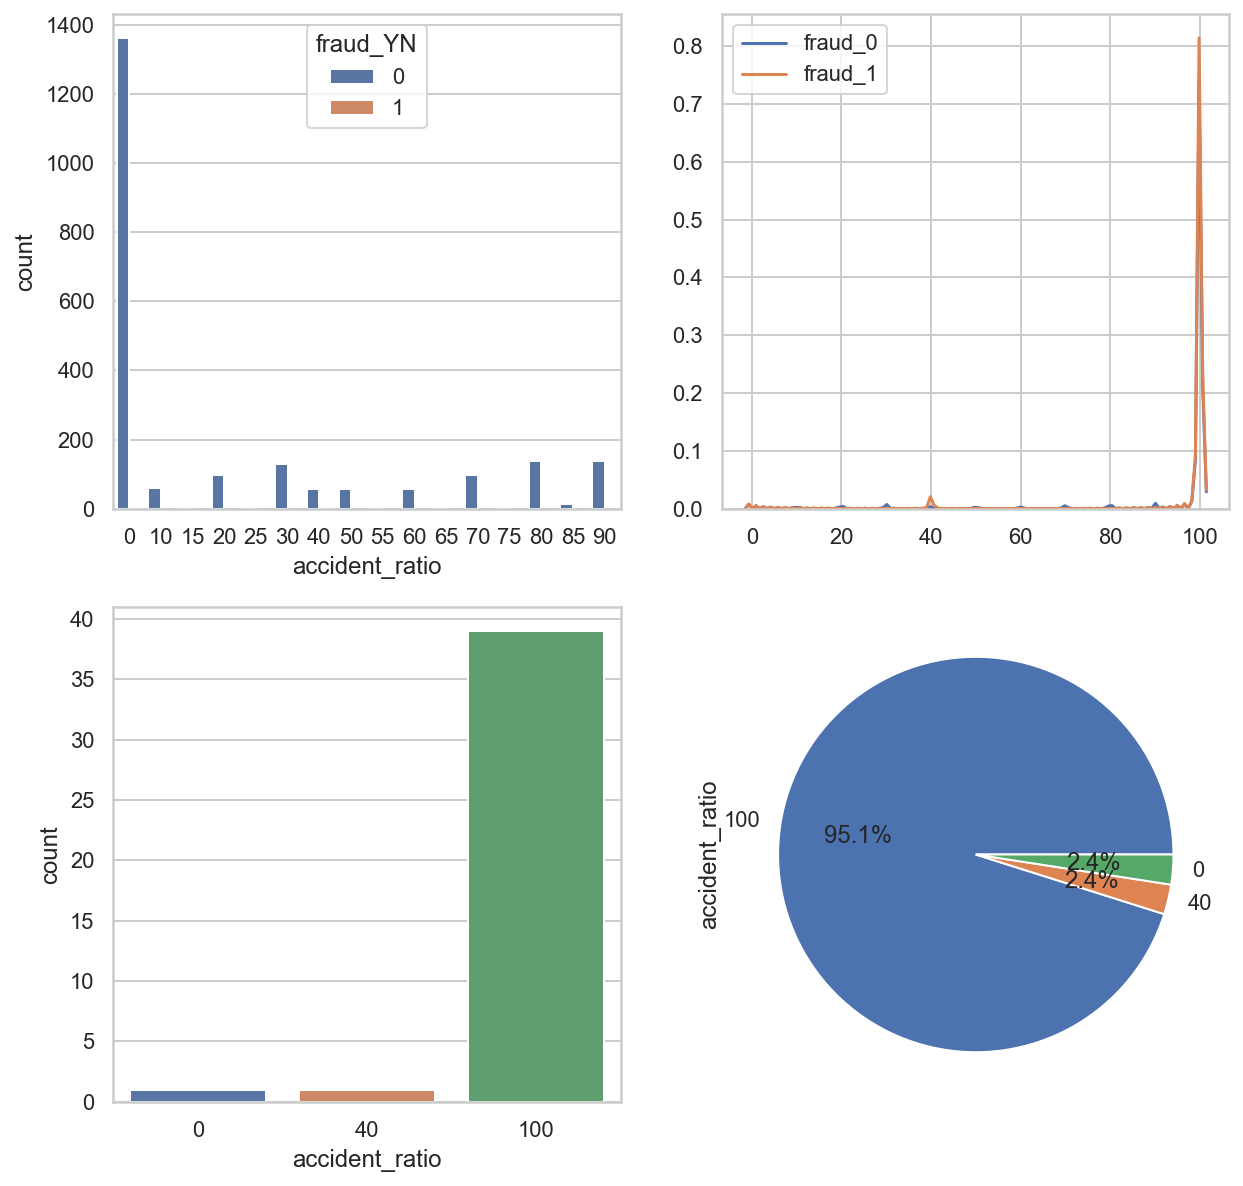

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2, 2, figsize=(10,10))

t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]


plt.subplot(2,2,1)
sns.countplot('accident_ratio', data=socar_df[socar_df['accident_ratio']!=100], hue='fraud_YN')

plt.subplot(2,2,3)
sns.countplot('accident_ratio', data=socar_df[socar_df.fraud_YN == 1])

plt.subplot(2,2,2)
t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]

sns.kdeplot(t0['accident_ratio'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['accident_ratio'], bw=0.5, label = 'fraud_1')

plt.subplot(2,2,4)
socar_df[socar_df['fraud_YN']==1]['accident_ratio'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

- countplot fraud 0, 1을 함께 그리면 데이터 불균형으로 사기데이터가 잘안보임
- KDE로 확인시 100%의 과실율일때, 사기일때 비사기보다 밀도추정 높음
- fraud만 떼어보니 과실율 0, 40, 100 만 일어났고, 대부분 100
- 0, 40, 100, 그외과실율을 하나로 원핫인코딩 해도 될것 같다

### 3. pf_type
- 보험료(자기부담금)

```
1: 자기부담금 5만원 (보험료 고)
2: 자기부담금 30만원 (보험료 중)
3: 자기부담금 70만원 (보험료 하)
```

In [127]:
socar_df.pf_type.unique()

array([2, 3, 1])

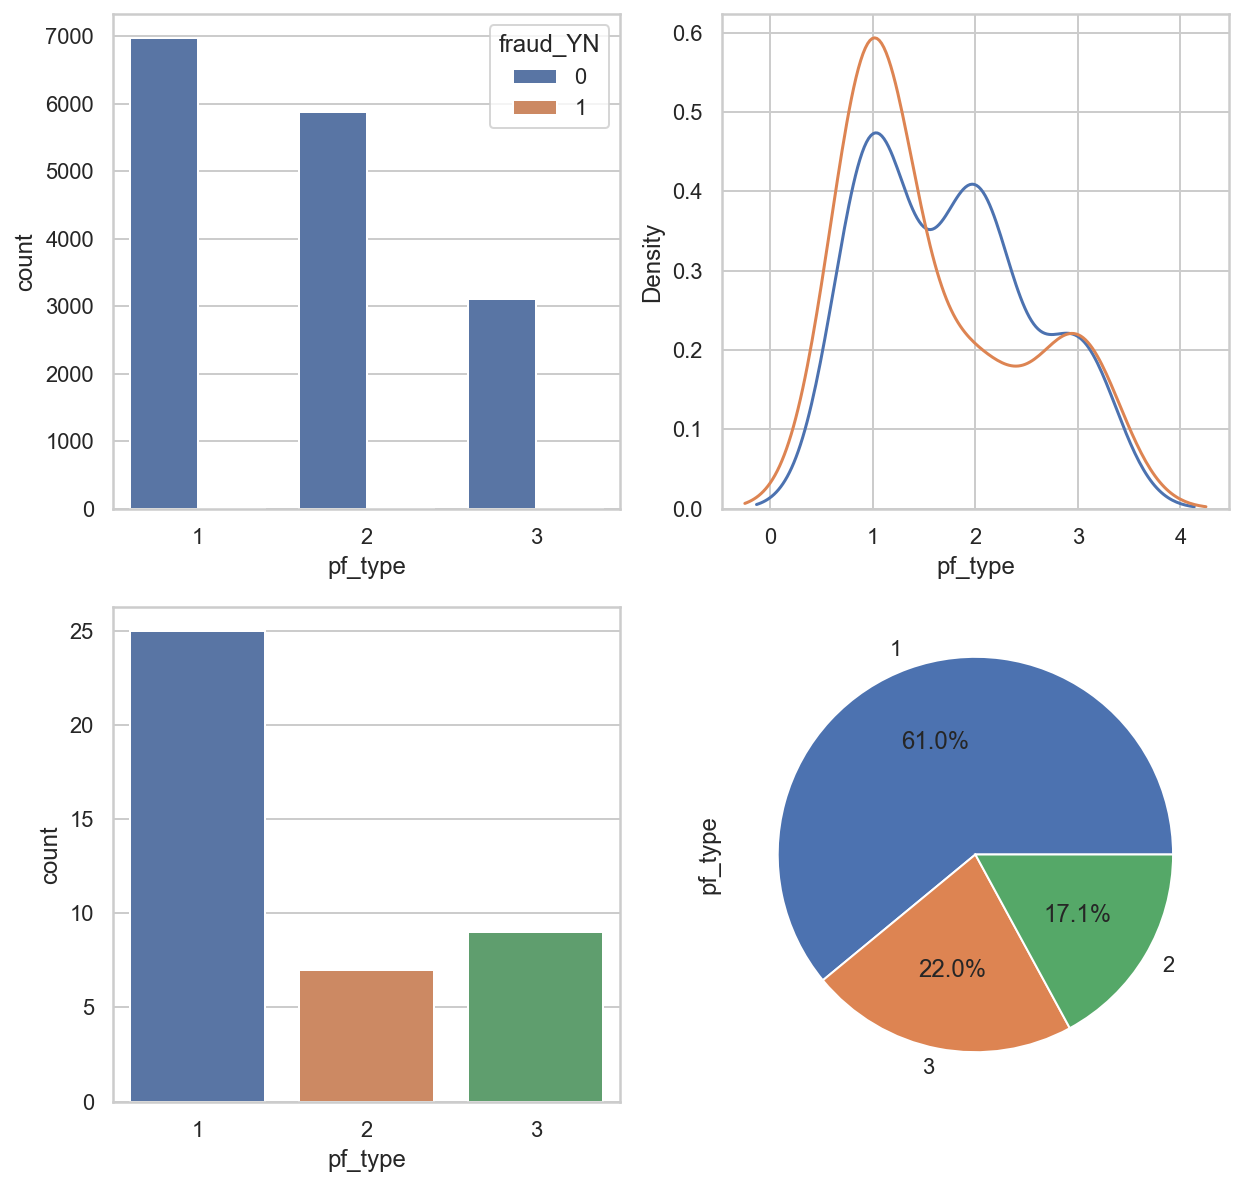

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2, 2, figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot('pf_type', data=socar_df, hue='fraud_YN')

plt.subplot(2,2,3)
sns.countplot('pf_type', data=socar_df[socar_df.fraud_YN == 1])

plt.subplot(2,2,2)
sns.kdeplot(t0['pf_type'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['pf_type'], bw=0.5, label = 'fraud_1')

plt.subplot(2,2,4)
socar_df[socar_df['fraud_YN']==1]['pf_type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

### 4. socarpass, socarsave
- socarpass: 1- 구독서비스(선결제 차감) 사용 / 0 - 미사용
- socarsave: 1 - 3년 이상 차량 / 0 - 3년 미만 차량

In [134]:
socar_df.socarpass.unique()

array([0, 1])

In [135]:
socar_df.socarsave.unique()

array([0, 1])

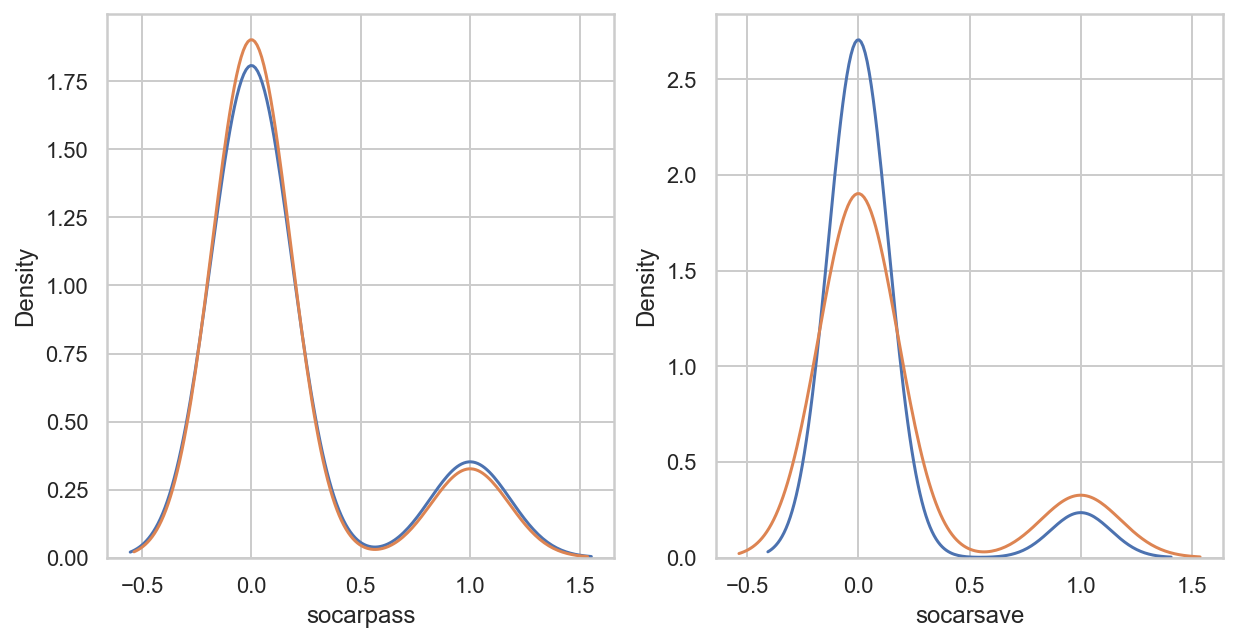

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 2, figsize=(10,5))

t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]

plt.subplot(1,2,1)
sns.kdeplot(t0['socarpass'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['socarpass'], bw=0.5, label = 'fraud_1')

plt.subplot(1,2,2)
sns.kdeplot(t0['socarsave'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['socarsave'], bw=0.5, label = 'fraud_1')

plt.show()

### 5. insurance_site_aid_YN, police_site_aid_YN

#보험사 현장출동 유무
case when site_aid_YN like "%Y%" then 1
when site_aid_YN like "%N%" then 2
else 0 -- 알수없음
end as insurance_site_aid_YN,

#경찰 출동 유무 : 1 미신고 / 2 신고
case when police_rprt_cd like "%신고%" then 1
when police_rprt_cd like "%미신고%" then 2
else 0
end as police_site_aid_YN,

In [156]:
socar_df.insurance_site_aid_YN.unique()

array([0, 1, 2])

In [157]:
socar_df.police_site_aid_YN.unique()

array([0, 1])

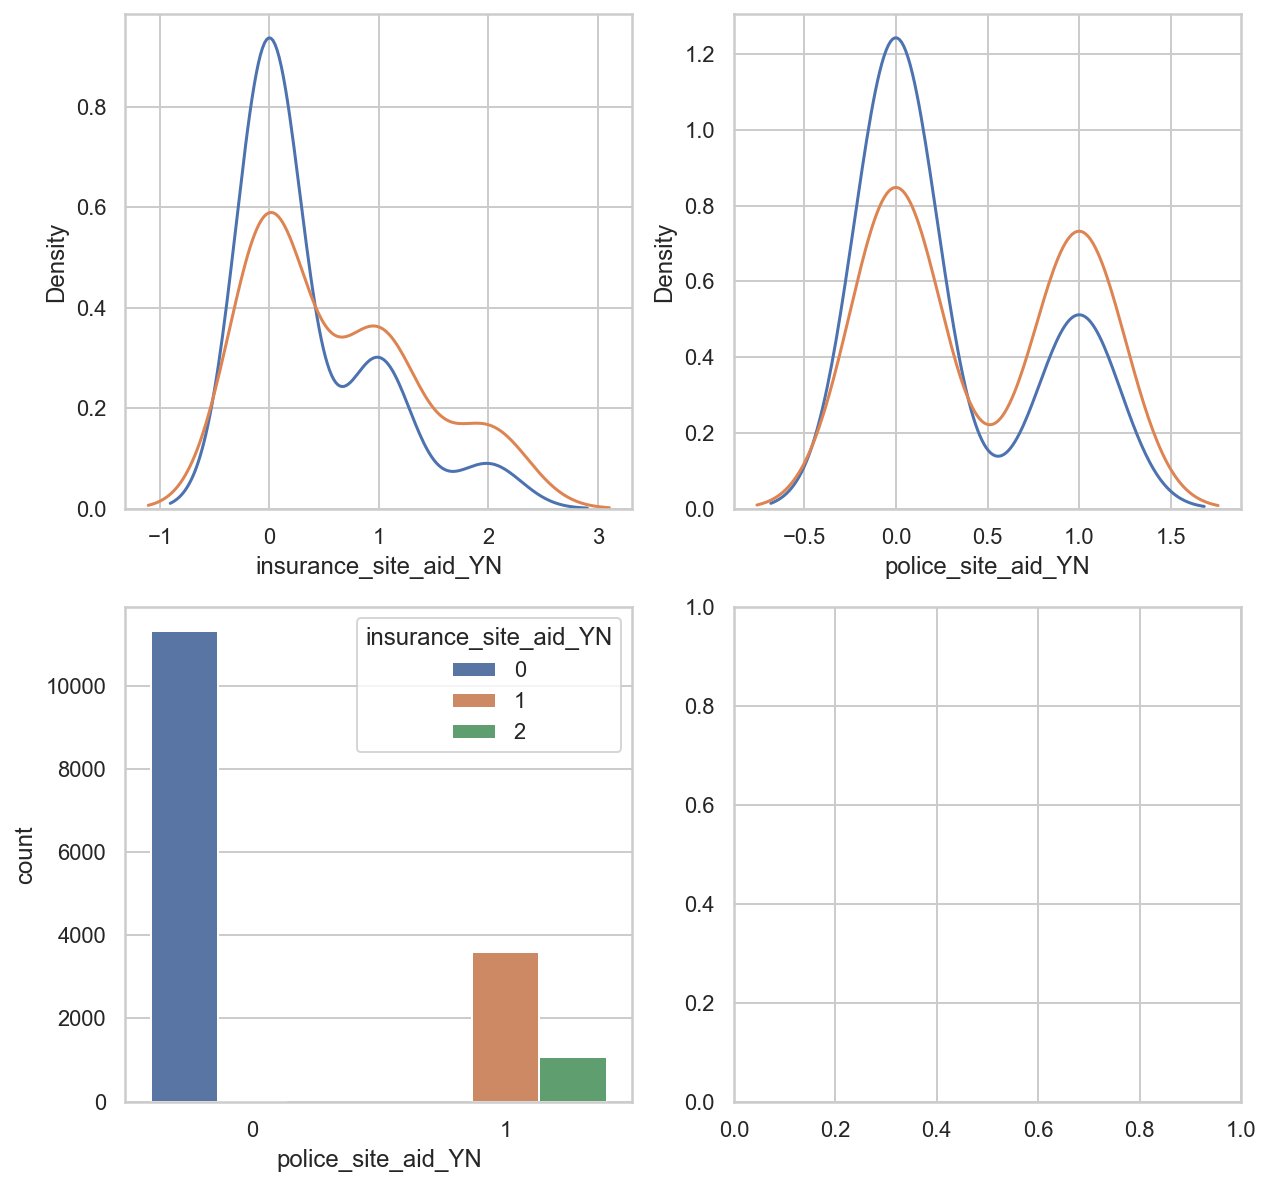

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2, 2, figsize=(10,10))

t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]

plt.subplot(2,2,1)
sns.kdeplot(t0['insurance_site_aid_YN'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['insurance_site_aid_YN'], bw=0.5, label = 'fraud_1')

plt.subplot(2,2,2)
sns.kdeplot(t0['police_site_aid_YN'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['police_site_aid_YN'], bw=0.5, label = 'fraud_1')

plt.subplot(2,2,3)
sns.countplot('police_site_aid_YN', hue='insurance_site_aid_YN', data=socar_df)


plt.show()

In [181]:
socar_df[socar_df['insurance_site_aid_YN']==0][socar_df['police_site_aid_YN']==1]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set


- Police = 0 & Insurance = 1 -> 3건 >> 경찰 출동안하고 보험사만 출동  >> 3건
- Police = 0 & Insurance = 2 -> 0건 >> 경찰 출동안하고 보험사 모두 출동 안한 경우 >> 0건
- Police = 1 & Insurance = 0 -> 0건 >> 경찰만 출동한 경우 없음
> 뭔가 이상하다. 컬럼 보정이 필요해 보임

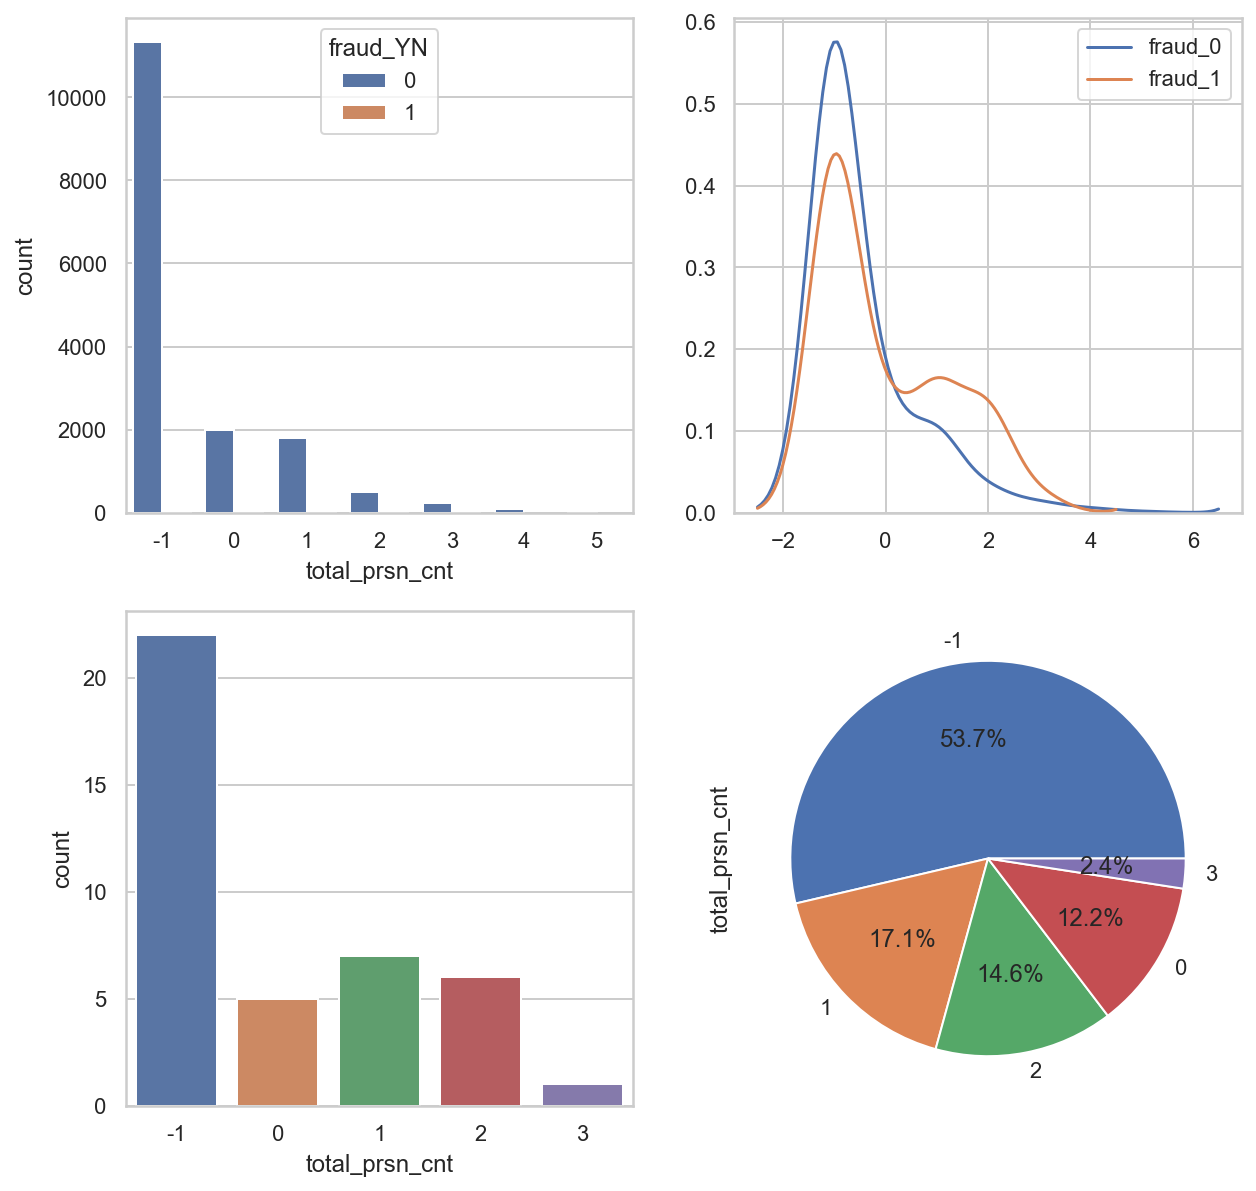

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2, 2, figsize=(10,10))

t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]


plt.subplot(2,2,1)
sns.countplot('total_prsn_cnt', data=socar_df, hue='fraud_YN')

plt.subplot(2,2,3)
sns.countplot('total_prsn_cnt', data=socar_df[socar_df.fraud_YN == 1])

plt.subplot(2,2,2)
sns.kdeplot(t0['total_prsn_cnt'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['total_prsn_cnt'], bw=0.5, label = 'fraud_1')

plt.subplot(2,2,4)
socar_df[socar_df['fraud_YN']==1]['total_prsn_cnt'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

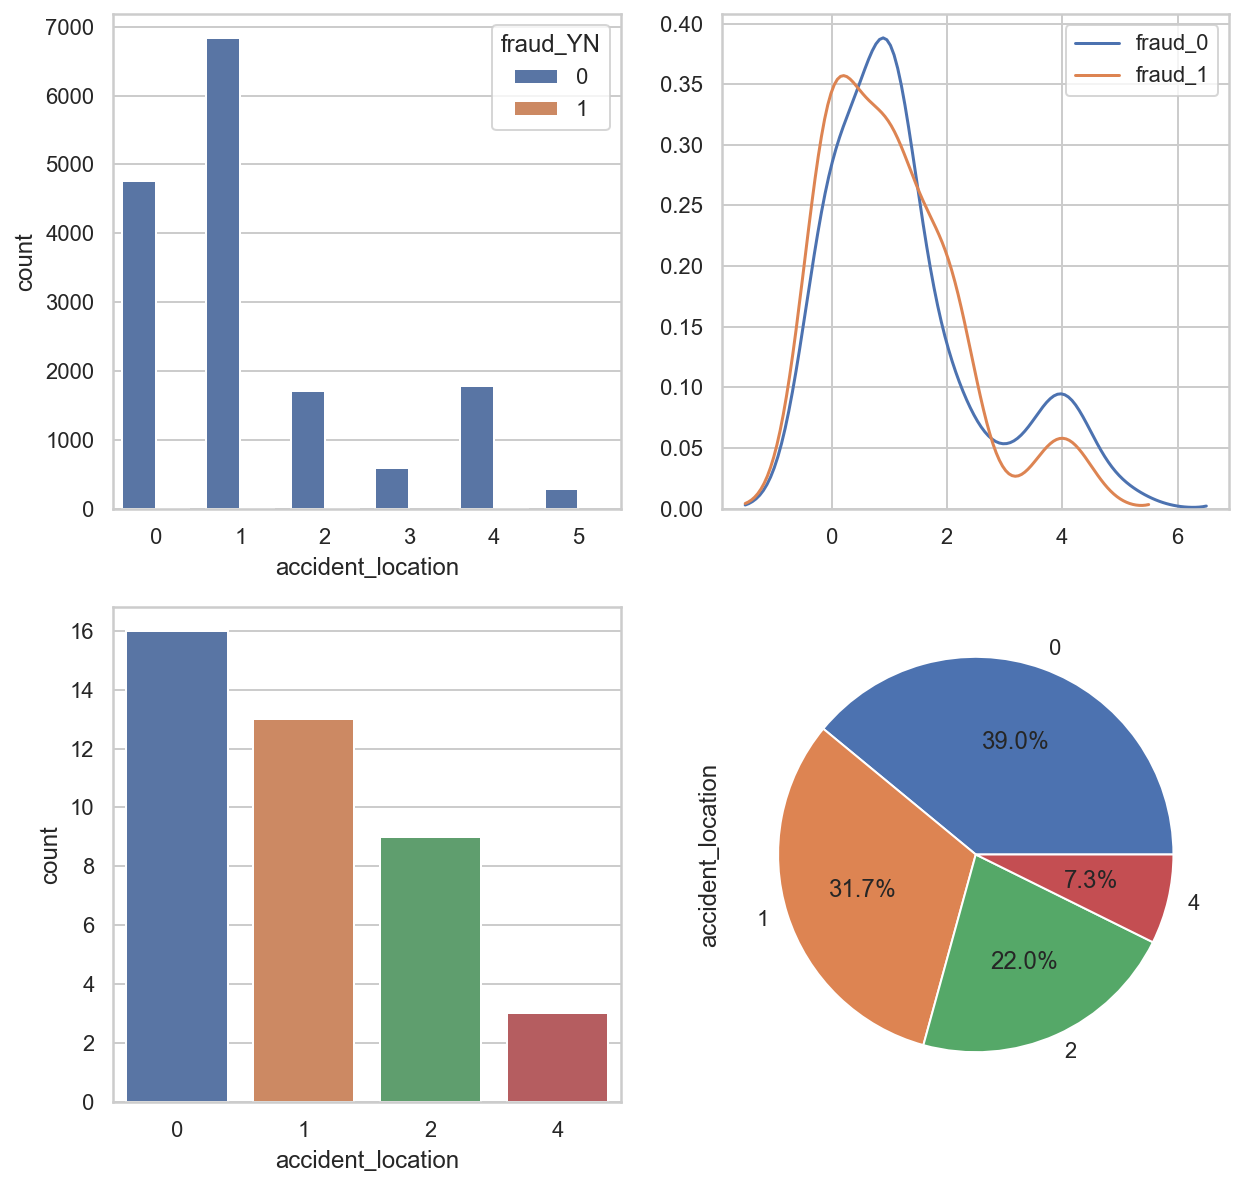

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2, 2, figsize=(10,10))

t0 = socar_df.loc[socar_df['fraud_YN']==0]
t1 = socar_df.loc[socar_df['fraud_YN']==1]


plt.subplot(2,2,1)
sns.countplot('accident_location', data=socar_df, hue='fraud_YN')

plt.subplot(2,2,3)
sns.countplot('accident_location', data=socar_df[socar_df.fraud_YN == 1])

plt.subplot(2,2,2)
sns.kdeplot(t0['accident_location'], bw=0.5, label = 'fraud_0')
sns.kdeplot(t1['accident_location'], bw=0.5, label = 'fraud_1')

plt.subplot(2,2,4)
socar_df[socar_df['fraud_YN']==1]['accident_location'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

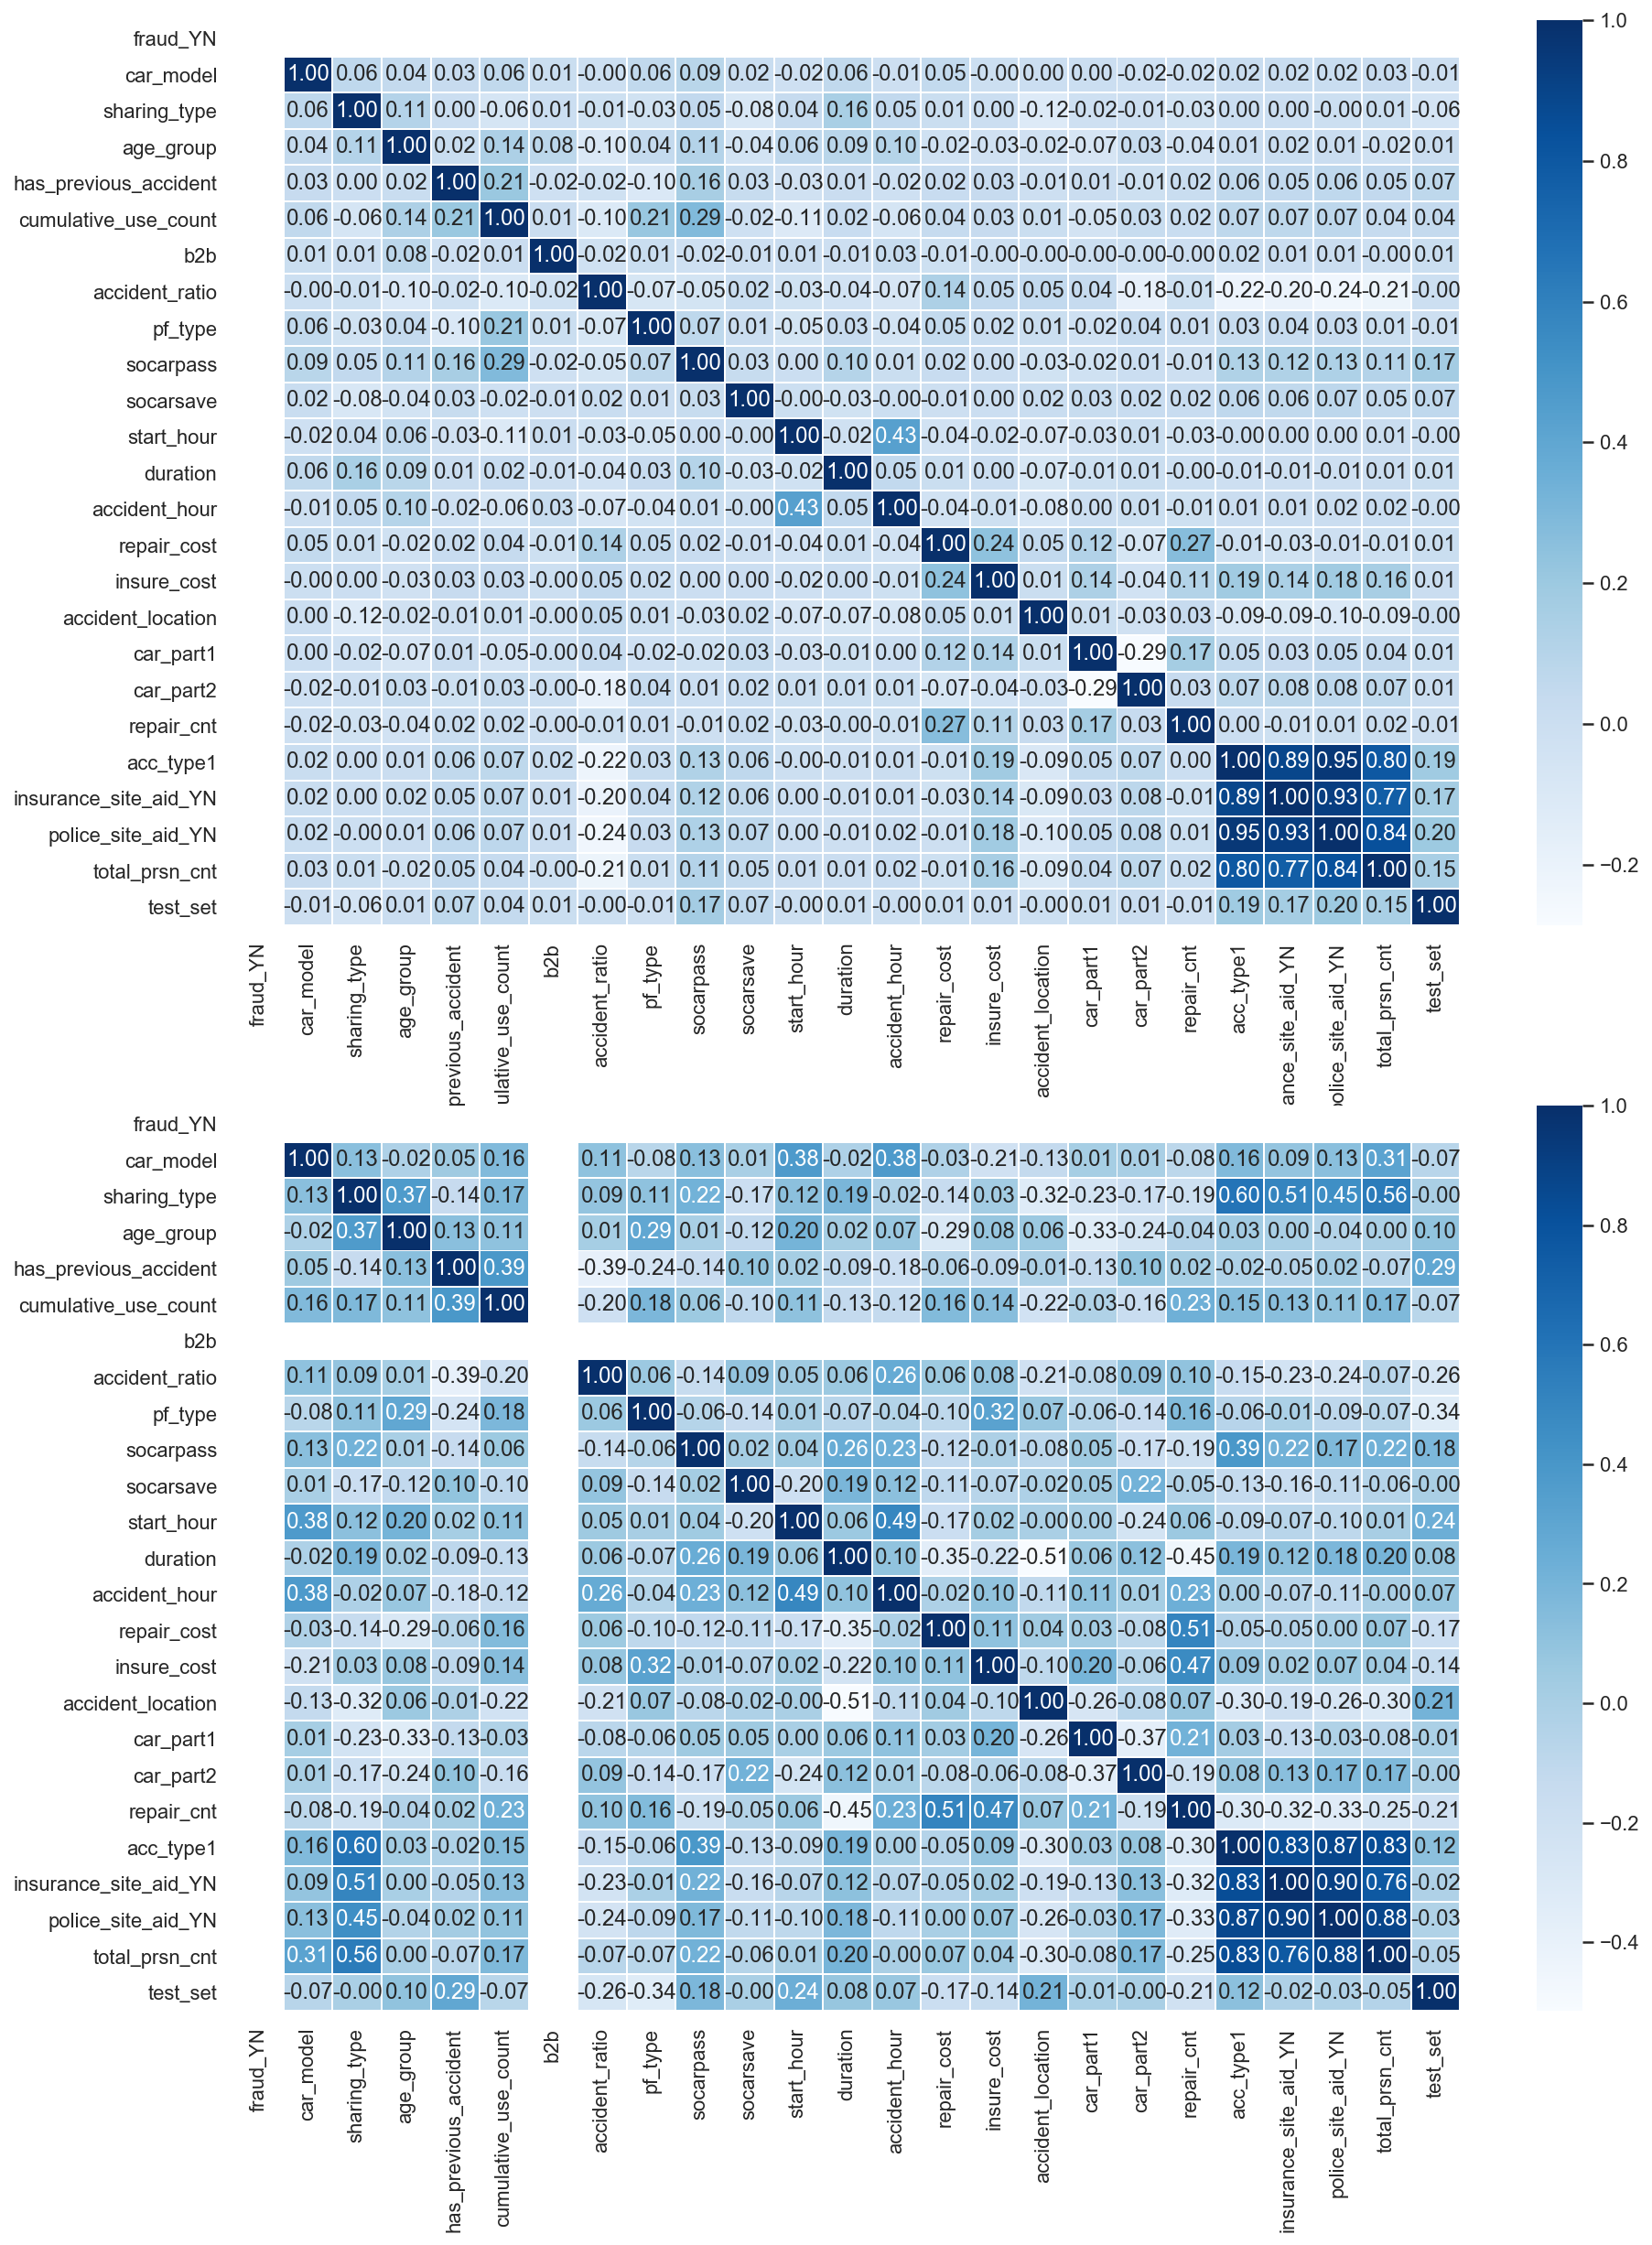

In [253]:
fig, ax= plt.subplots(2, 1, figsize=(15,20))

sns.heatmap(data = socar_df[socar_df['fraud_YN'] == 0].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues', ax = ax[0])

sns.heatmap(data = socar_df[socar_df['fraud_YN'] == 1].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues', ax = ax[1])

- 전체적으로 봤을때는 컬럼별 상관관계가 전혀 보이지 않았으나, fraud data만 뽑아봤을때에는 컬럼별 어느정도의 연관성이 보인다. 


In [305]:
# 결측값 처리

In [310]:
len(socar_df[socar_df.accident_hour == -1]), len(socar_df[socar_df.accident_location == 5])

(36, 288)

In [322]:
len(socar_df[socar_df.accident_location == 5][socar_df.accident_hour == -1][socar_df.repair_cost== 0][socar_df.insure_cost== 0])

14

In [323]:
len(socar_df[socar_df.accident_location == 5][socar_df.repair_cost== 0][socar_df.insure_cost== 0])

121

In [320]:
len(socar_df[socar_df.accident_hour == -1][socar_df.repair_cost== 0][socar_df.insure_cost== 0])

17

In [ ]:
# 컬럼의 많은 값이 결측치인 row 는 지워보자

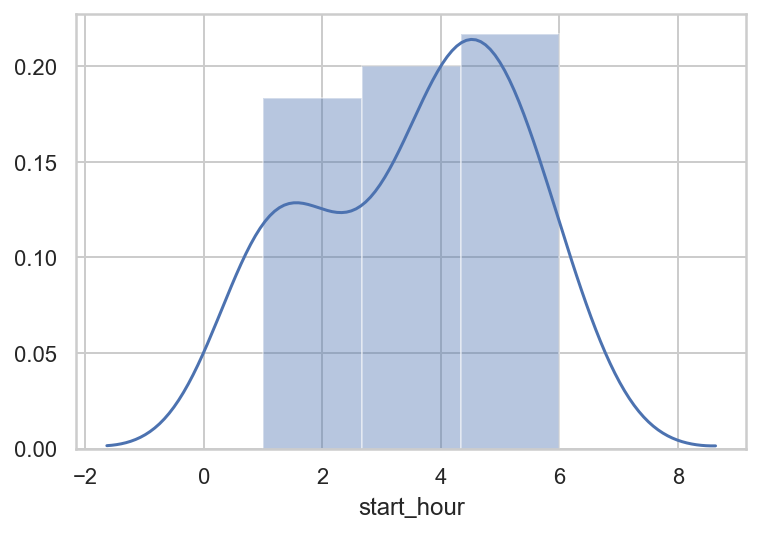

In [57]:
sns.distplot(socar_df[socar_df.accident_hour== -1].start_hour)

In [140]:
socar_df.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt', 'test_set'],
      dtype='object')

In [257]:
socar_del = socar_df.replace({'accident_hour': -1}, {'accident_hour': np.nan})
socar_del.replace({'accident_location':5}, {'accident_location':1}, inplace = True)

In [258]:
socar_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          15964 non-null  float64
 14  repair_cost            16000 non-null  float64
 15  in

In [284]:
# accident_hour 결측치 (-1인 데이터) row 삭제
socar_1 = socar_del.dropna()

# 독립션수 선정
ind_cols = ['start_hour']

# 학습시키려는 변수 나누기
X = socar_1[ind_cols]
y = socar_1[['accident_hour']]

In [285]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X = X.apply(lambda x: encoder.fit_transform(x))
y = y.apply(lambda y: encoder.fit_transform(y))

In [286]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [301]:
# 학습모형 만들기 knn 알고리즘
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=70).fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [302]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn_pred)

0.4606952709051049

In [303]:
knn.score(X_test, y_test)

0.4606952709051049

In [304]:
from sklearn.metrics import classification_report

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.46      0.58       794
           1       0.43      0.62      0.51       792
           2       0.00      0.00      0.00        80
           3       0.26      0.21      0.23       246
           4       0.35      0.44      0.39       530
           5       0.46      0.44      0.45       751

    accuracy                           0.46      3193
   macro avg       0.38      0.36      0.36      3193
weighted avg       0.49      0.46      0.46      3193



In [266]:
# 인코딩에서 숫자로 변환되었던 항목값 
class_cd = pd.Series(encoder.classes_).to_dict()

# 결측치가 하나 이상 있는 Case만 선택
df_ms_only = socar_del[socar_del.isna().any(axis=1)]

# 결측치가 없는 Case만 선택
df_ms_dropna = socar_del.dropna()

# 평가에 필요한 칼럼만 뽑으면서, 동시에 인코딩 진행
df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x))

# 학습모형에 집어 넣어 값 예측하기
knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

# 예측값 저장하기
fill_na_values = knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

# 결측치가 있는 곳에 예측값 집어 넣기
df_ms_only['accident_hour'] = fill_na_values

# 인코딩된 칼럼값을 되돌리기
df_ms_only['accident_hour'] = df_ms_only['accident_hour'].replace(class_cd)

#원래 데이터에 합치기
df_ms_final = pd.concat([df_ms_dropna, df_ms_only], axis=0)

In [233]:
df_ms_final.accident_hour.unique()

array([4., 6., 5., 1., 2., 3.])